In [13]:
import pandas as pd
import numpy as np

# Generate synthetic data with a linear relationship
np.random.seed(42) # for reproducibility
X = np.linspace(0, 10, 25) # At least 20 data points
y = 2 * X + 1 + np.random.normal(0, 1.5, 25) # Linear relationship with some noise

# Create a DataFrame
df = pd.DataFrame({'X': X, 'y': y})

# Save the DataFrame to a CSV file
df.to_csv('linear_regression_data.csv', index=False)

print("CSV file 'linear_regression_data.csv' created successfully.")

CSV file 'linear_regression_data.csv' created successfully.


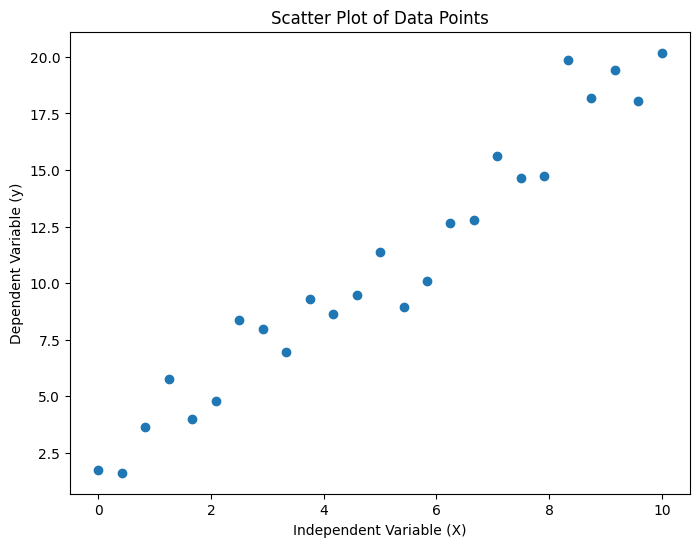

Based on the scatter plot, there appears to be a strong positive linear trend between the independent variable (X) and the dependent variable (y). As X increases, y generally increases in a roughly linear fashion.


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['y'])

# Label axes and add a title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Scatter Plot of Data Points')

# Display the scatter plot
plt.show()

# Describe the observed trend
print("Based on the scatter plot, there appears to be a strong positive linear trend between the independent variable (X) and the dependent variable (y). As X increases, y generally increases in a roughly linear fashion.")

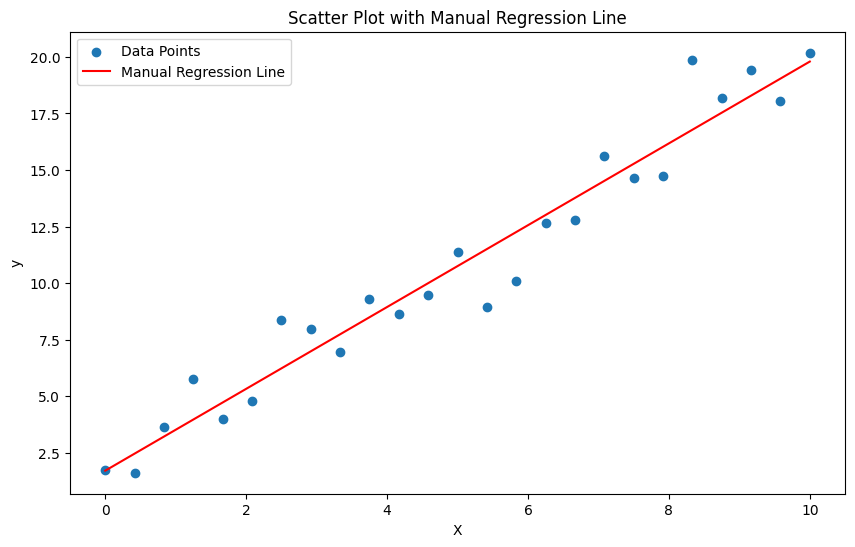

Calculated Slope (m): 1.8075883829346573
Calculated Intercept (c): 1.7167959973395774


In [15]:
# 1. Calculate the mean of the 'X' column and the mean of the 'y' column
mean_x = df['X'].mean()
mean_y = df['y'].mean()

# 2. Calculate the slope (m) of the regression line
numerator = np.sum((df['X'] - mean_x) * (df['y'] - mean_y))
denominator = np.sum((df['X'] - mean_x)**2)
m = numerator / denominator

# 3. Calculate the intercept (c) of the regression line
c = mean_y - m * mean_x

# 4. Generate a set of y-values for the manually calculated regression line
y_manual = m * df['X'] + c

# 5. Create a scatter plot of the original data points
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['y'], label='Data Points')

# 6. Plot the manually calculated regression line
plt.plot(df['X'], y_manual, color='red', label='Manual Regression Line')

# 7. Add labels to the x and y axes and a title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot with Manual Regression Line')

# 8. Add a legend
plt.legend()

# 9. Display the plot
plt.show()

# 10. Print the calculated values of the slope (m) and intercept (c)
print(f"Calculated Slope (m): {m}")
print(f"Calculated Intercept (c): {c}")

In [ ]:
from sklearn.linear_model import LinearRegression

# 2. Create an instance of the LinearRegression model.
model = LinearRegression()

# 3. Reshape the independent variable X from the DataFrame df into a 2D array.
X_reshaped = df['X'].values.reshape(-1, 1)

# 4. Fit the linear regression model to the reshaped independent variable and the dependent variable y.
model.fit(X_reshaped, df['y'])

print("Scikit-learn linear regression model fitted successfully.")

Scikit-learn linear regression model fitted successfully.


Scikit-learn Intercept: 1.7167959973395757
Scikit-learn Slope: 1.8075883829346575


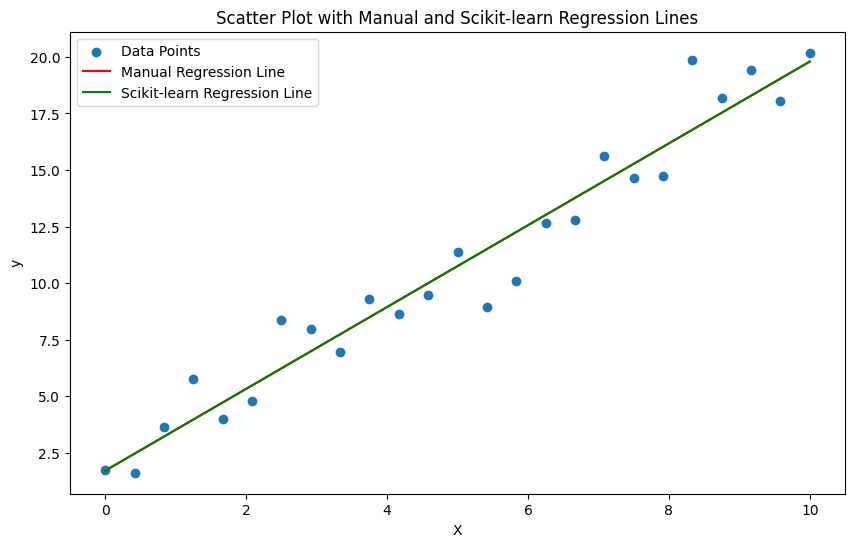

In [17]:
# 1. Print the intercept of the scikit-learn model
print(f"Scikit-learn Intercept: {model.intercept_}")

# 2. Print the slope of the scikit-learn model
print(f"Scikit-learn Slope: {model.coef_[0]}")

# 3. Generate a set of y-values for the scikit-learn regression line
y_sklearn = model.predict(X_reshaped)

# 4. Create a new scatter plot of the original data points
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['y'], label='Data Points')

# 5. Plot the manually calculated regression line
plt.plot(df['X'], y_manual, color='red', label='Manual Regression Line')

# 6. Plot the scikit-learn regression line
plt.plot(df['X'], y_sklearn, color='green', label='Scikit-learn Regression Line')

# 7. Add labels to the x and y axes and a title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot with Manual and Scikit-learn Regression Lines')

# 8. Add a legend
plt.legend()

# 9. Display the plot
plt.show()

In [18]:
# 1. Choose at least two new values for the independent variable (X)
new_x_values = np.array([11, 12.5]) # Examples: 11 and 12.5, outside the original range of 0-10

# 2. Reshape the new X values into a 2D array
new_x_values_reshaped = new_x_values.reshape(-1, 1)

# 3. Use the fitted scikit-learn model to predict the corresponding y values
predicted_y_values = model.predict(new_x_values_reshaped)

# 4. Print the new X values and their corresponding predicted y values
print(f"New X values: {new_x_values}")
print(f"Predicted y values: {predicted_y_values}")

# 5. Briefly comment on whether the predicted values seem reasonable
print("\nCommentary on predictions:")
print(f"The original data ranged from X=0 to X=10, with y values generally increasing.")
print(f"For X=11, the predicted y is {predicted_y_values[0]:.2f}, and for X=12.5, the predicted y is {predicted_y_values[1]:.2f}.")
print("Based on the positive linear trend observed in the original data and the fitted regression line, these predicted y values appear reasonable as they continue the increasing trend for X values beyond the original range.")

New X values: [11.  12.5]
Predicted y values: [21.60026821 24.31165078]

Commentary on predictions:
The original data ranged from X=0 to X=10, with y values generally increasing.
For X=11, the predicted y is 21.60, and for X=12.5, the predicted y is 24.31.
Based on the positive linear trend observed in the original data and the fitted regression line, these predicted y values appear reasonable as they continue the increasing trend for X values beyond the original range.


In [19]:
# Calculate the squared differences between actual and predicted y values
squared_differences = (df['y'] - y_sklearn)**2

# Calculate the mean of the squared differences (MSE)
mse_sklearn = squared_differences.mean()

# Print the calculated MSE value
print(f"Manually Calculated MSE (Scikit-learn model): {mse_sklearn}")

Manually Calculated MSE (Scikit-learn model): 1.6421580219470848


Updated Scikit-learn Intercept: 1.501656667107417
Updated Scikit-learn Slope: 1.8670521472190629


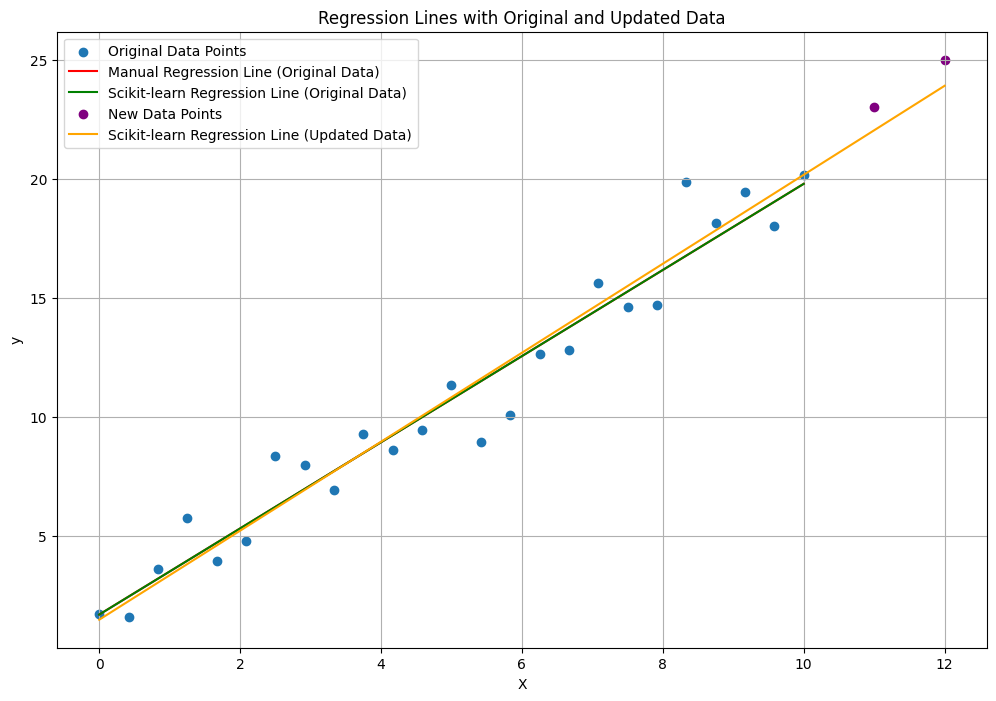

Manually Calculated MSE (Updated Scikit-learn model): 1.6348194693557743

Commentary on the effect of new data points:
Original Scikit-learn Intercept: 1.7168
Original Scikit-learn Slope: 1.8076
Original MSE: 1.6422

The new data points appear to be above the original regression line.
Adding these points has likely pulled the regression line upwards, resulting in:
- A change in intercept from 1.7168 to 1.5017.
- A change in slope from 1.8076 to 1.8671.
- A change in MSE from 1.6422 to 1.6348.
The change in slope and intercept indicates that the line has adjusted to better fit the new data points. The change in MSE reflects how well the new model fits the *updated* dataset, including the new points.


In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a new DataFrame by appending one or two new rows
new_data = pd.DataFrame({'X': [11, 12], 'y': [23, 25]}) # Adding two new points
df_updated = pd.concat([df, new_data], ignore_index=True)

# 2. Reshape the 'X' values from the updated DataFrame into a 2D array
X_updated_reshaped = df_updated['X'].values.reshape(-1, 1)

# 3. Fit a new LinearRegression model from scikit-learn to the updated dataset
model_updated = LinearRegression()
model_updated.fit(X_updated_reshaped, df_updated['y'])

# 4. Print the intercept and slope of the newly fitted model
print(f"Updated Scikit-learn Intercept: {model_updated.intercept_}")
print(f"Updated Scikit-learn Slope: {model_updated.coef_[0]}")

# 5. Predict the 'y' values using the updated model and the 'X' values from the updated DataFrame
y_updated_sklearn = model_updated.predict(X_updated_reshaped)

# 6. Create a scatter plot showing the original data points, the manually calculated regression line, the scikit-learn regression line from the original data, and the new scikit-learn regression line from the updated data.
plt.figure(figsize=(12, 8))
plt.scatter(df['X'], df['y'], label='Original Data Points')
plt.plot(df['X'], y_manual, color='red', label='Manual Regression Line (Original Data)')
plt.plot(df['X'], y_sklearn, color='green', label='Scikit-learn Regression Line (Original Data)')
plt.scatter(new_data['X'], new_data['y'], color='purple', label='New Data Points') # Plot the new points
plt.plot(df_updated['X'], y_updated_sklearn, color='orange', label='Scikit-learn Regression Line (Updated Data)')


# Include a legend to distinguish the lines and data points.
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Lines with Original and Updated Data')
plt.legend()
plt.grid(True)
plt.show()

# 7. Manually calculate the Mean Squared Error (MSE) for the new scikit-learn model using the updated DataFrame.
mse_updated_sklearn_manual = np.mean((df_updated['y'] - y_updated_sklearn)**2)

# 8. Print the newly calculated MSE.
print(f"Manually Calculated MSE (Updated Scikit-learn model): {mse_updated_sklearn_manual}")

# 9. Comment on how the new data points affected the regression line (slope and intercept) and the MSE compared to the original model.
print("\nCommentary on the effect of new data points:")
print(f"Original Scikit-learn Intercept: {model.intercept_:.4f}")
print(f"Original Scikit-learn Slope: {model.coef_[0]:.4f}")
print(f"Original MSE: {mse_sklearn:.4f}")
print("\nThe new data points appear to be above the original regression line.")
print("Adding these points has likely pulled the regression line upwards, resulting in:")
print(f"- A change in intercept from {model.intercept_:.4f} to {model_updated.intercept_:.4f}.")
print(f"- A change in slope from {model.coef_[0]:.4f} to {model_updated.coef_[0]:.4f}.")
print(f"- A change in MSE from {mse_sklearn:.4f} to {mse_updated_sklearn_manual:.4f}.")
print("The change in slope and intercept indicates that the line has adjusted to better fit the new data points. The change in MSE reflects how well the new model fits the *updated* dataset, including the new points.")